In [3]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install scipy
!pip install gdown

In [4]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as stats
from sklearn.impute import SimpleImputer as Imputer

import gdown

In [5]:
file_id = "13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, "flight_data.csv", quiet=False)

flight_data = pd.read_csv("flight_data.csv")

Downloading...
From (original): https://drive.google.com/uc?id=13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r
From (redirected): https://drive.google.com/uc?id=13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r&confirm=t&uuid=c6b3c8b0-5ce3-4f63-a6e4-29d0a82bbdff
To: /content/flight_data.csv
100%|██████████| 1.32G/1.32G [00:16<00:00, 81.9MB/s]


In [6]:
flight_data.shape
flight_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,...,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,index
0,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,...,NaN,95.0,103.0,619.0,7.0,0.0,8.0,0.0,0.0,0
1,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,...,NaN,100.0,106.0,619.0,0.0,0.0,0.0,0.0,0.0,1
2,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10800,...,NaN,130.0,110.0,672.0,0.0,0.0,0.0,0.0,0.0,2
3,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10821,...,NaN,215.0,216.0,1670.0,14.0,0.0,1.0,0.0,0.0,3
4,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",11259,...,NaN,105.0,98.0,580.0,0.0,0.0,0.0,0.0,0.0,4


In [7]:
print(flight_data.columns.tolist())

['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'ARR_TIME', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'CANCELLED', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'index']


In [8]:
#Goal: See how often each delay reason occurs and how big they tend to be.
delay_cols = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']

# Check missingness
flight_data[delay_cols].isna().sum()

# Summary stats
flight_data[delay_cols].describe()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,7.546988e+06,7.546988e+06,7.546988e+06,7.546988e+06,7.546988e+06
mean,4.995800e+00,9.005415e-01,2.742626e+00,2.418462e-02,5.974389e+00
std,3.550577e+01,1.585831e+01,1.530997e+01,1.390774e+00,3.163105e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.689000e+03,2.419000e+03,2.700000e+03,1.164000e+03,2.690000e+03


Text(0.5, 1.0, 'Distribution of Delay Minutes by Reason')

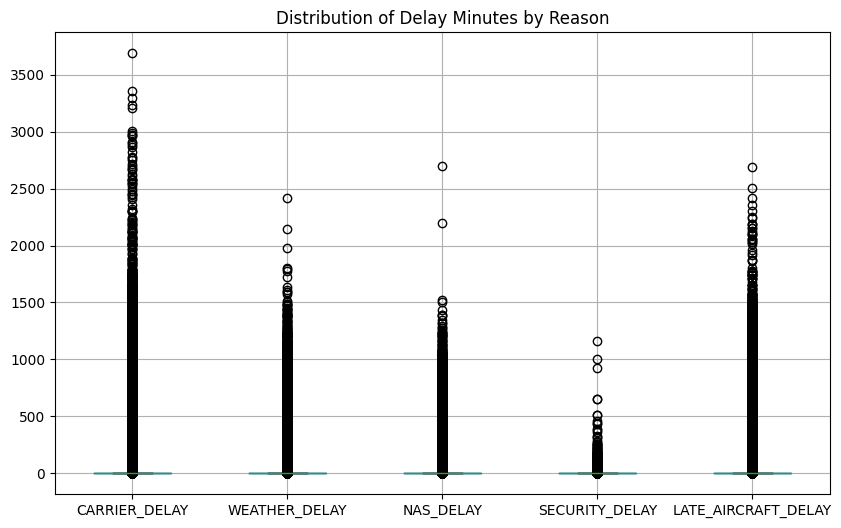

In [9]:
flight_data[delay_cols].boxplot(figsize=(10,6))
plt.title("Distribution of Delay Minutes by Reason")

##Frequency and Contribution of Each Delay Type

Compute the proportion of total delay minutes that each reason accounts for.

computer

([0, 1, 2, 3, 4],
 [Text(0, 0, 'LATE_AIRCRAFT_DELAY'),
  Text(1, 0, 'CARRIER_DELAY'),
  Text(2, 0, 'NAS_DELAY'),
  Text(3, 0, 'WEATHER_DELAY'),
  Text(4, 0, 'SECURITY_DELAY')])

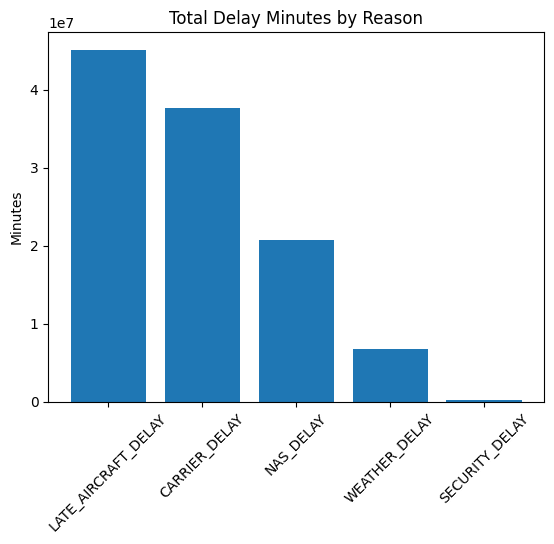

In [10]:
total_delay = flight_data[delay_cols].sum().sort_values(ascending=False)
plt.bar(total_delay.index, total_delay.values)
plt.title("Total Delay Minutes by Reason")
plt.ylabel("Minutes")
plt.xticks(rotation=45)

<Axes: >

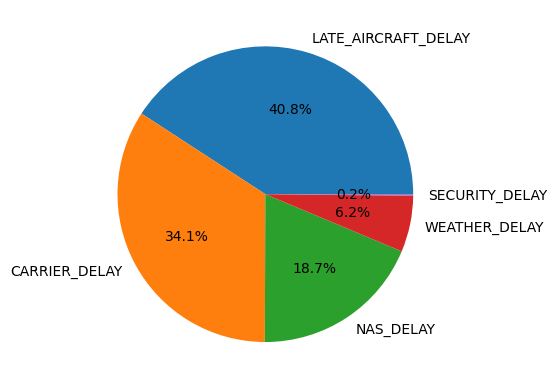

In [11]:
(total_delay / total_delay.sum()).plot(kind='pie', autopct='%1.1f%%')

##Relationship Between Delay Reason and Day/Month/Season

To see when different delay types are most common.

Text(0, 0.5, 'Minutes')

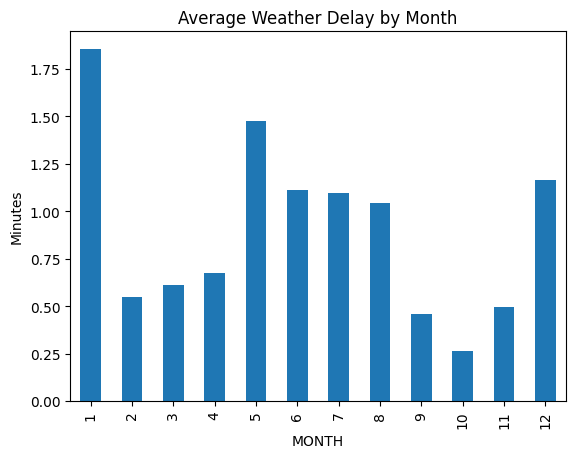

In [12]:
flight_data.groupby('MONTH')['WEATHER_DELAY'].mean().plot(kind='bar')
plt.title("Average Weather Delay by Month")
plt.ylabel("Minutes")

Text(0.5, 1.0, 'Correlation Between Delay Reasons')

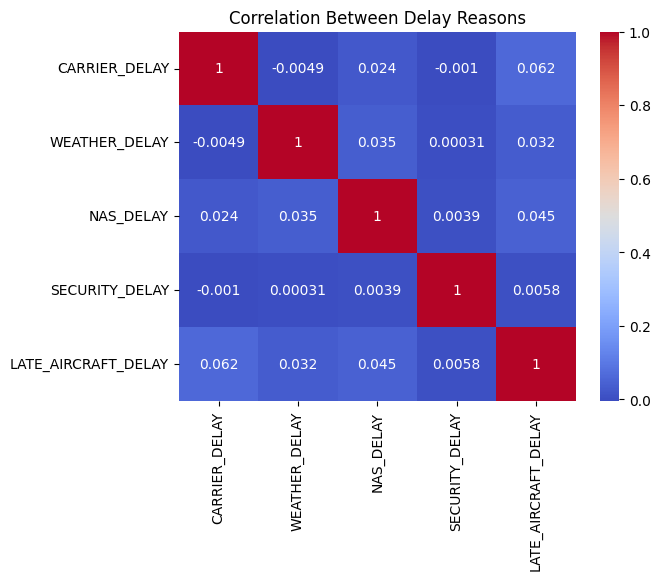

In [13]:
#correlation between delay reasons

sns.heatmap(flight_data[delay_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Delay Reasons")

Text(0, 0.5, 'Minutes')

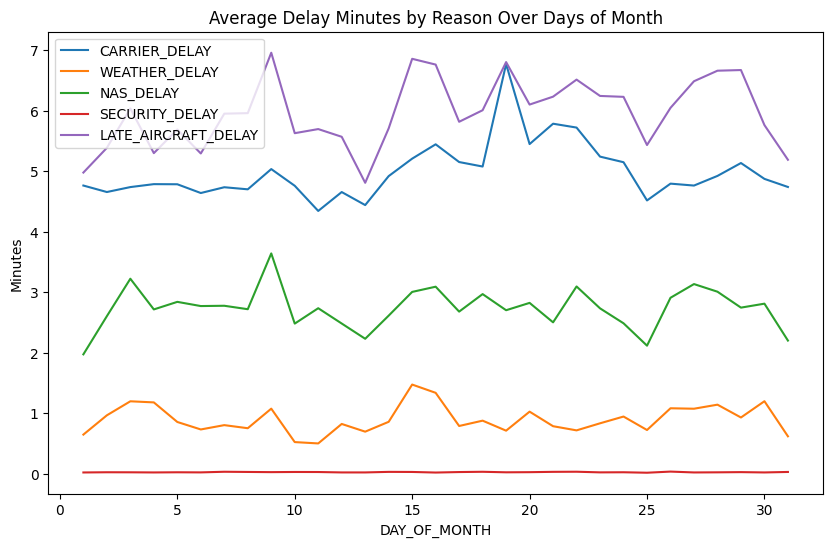

In [14]:
#line plot over time
delay_over_time = flight_data.groupby('DAY_OF_MONTH')[delay_cols].mean()
delay_over_time.plot(figsize=(10,6))
plt.title("Average Delay Minutes by Reason Over Days of Month")
plt.ylabel("Minutes")


##deeper eda

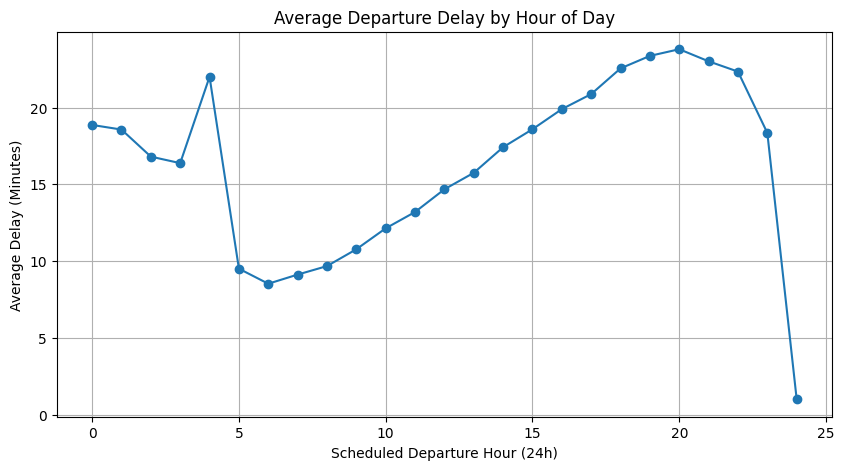

<Figure size 1000x600 with 0 Axes>

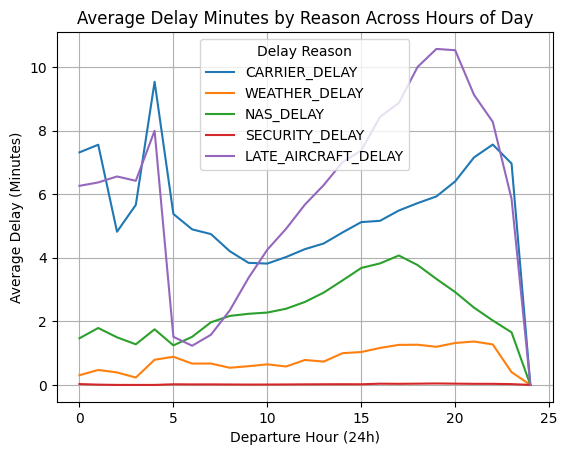

In [15]:
# Convert scheduled departure time (HHMM) to hour of day
flight_data['DEP_HOUR'] = (flight_data['CRS_DEP_TIME'] // 100).astype(int)

# 1️⃣ Average delay minutes by departure hour
delay_by_hour = flight_data.groupby('DEP_HOUR')[['DEP_DELAY_NEW']].mean()

plt.figure(figsize=(10,5))
plt.plot(delay_by_hour.index, delay_by_hour['DEP_DELAY_NEW'], marker='o')
plt.title("Average Departure Delay by Hour of Day")
plt.xlabel("Scheduled Departure Hour (24h)")
plt.ylabel("Average Delay (Minutes)")
plt.grid(True)
plt.show()

# 2️⃣ Breakdown by delay reason and hour
delay_reason_by_hour = flight_data.groupby('DEP_HOUR')[['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].mean()

plt.figure(figsize=(10,6))
delay_reason_by_hour.plot()
plt.title("Average Delay Minutes by Reason Across Hours of Day")
plt.xlabel("Departure Hour (24h)")
plt.ylabel("Average Delay (Minutes)")
plt.legend(title="Delay Reason")
plt.grid(True)
plt.show()

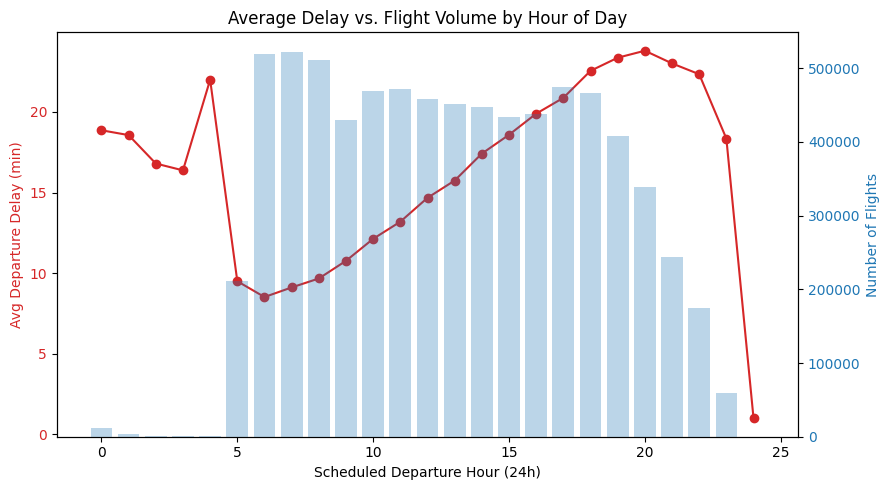

In [16]:
# Calculate average delay and flight count by hour
by_hour = flight_data.groupby('DEP_HOUR').agg({
    'DEP_DELAY_NEW': 'mean',
    'CRS_DEP_TIME': 'count'
}).rename(columns={'CRS_DEP_TIME': 'FLIGHT_COUNT'})

fig, ax1 = plt.subplots(figsize=(9,5))

# Average delay
color = 'tab:red'
ax1.set_xlabel('Scheduled Departure Hour (24h)')
ax1.set_ylabel('Avg Departure Delay (min)', color=color)
ax1.plot(by_hour.index, by_hour['DEP_DELAY_NEW'], color=color, marker='o', label='Avg Delay')
ax1.tick_params(axis='y', labelcolor=color)

# Flight count (secondary axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Flights', color=color)
ax2.bar(by_hour.index, by_hour['FLIGHT_COUNT'], alpha=0.3, color=color, label='Flight Volume')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Average Delay vs. Flight Volume by Hour of Day")
fig.tight_layout()
plt.show()


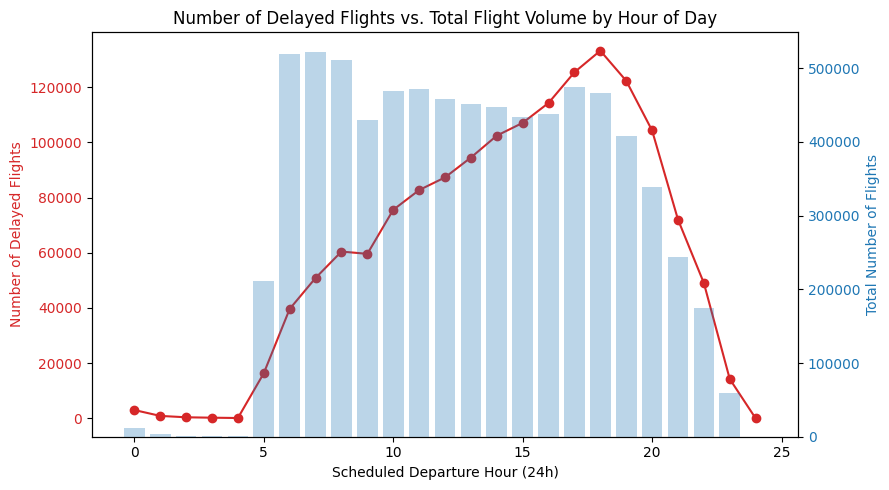

In [17]:
# Define what counts as a "delay" (e.g., >= 15 minutes)
flight_data['IS_DELAYED'] = flight_data['DEP_DELAY_NEW'] >= 15

# Group by hour: count total flights and number of delays
by_hour = flight_data.groupby('DEP_HOUR').agg({
    'IS_DELAYED': 'sum',      # number of delayed flights
    'CRS_DEP_TIME': 'count'   # total flights
}).rename(columns={'IS_DELAYED': 'NUM_DELAYED', 'CRS_DEP_TIME': 'FLIGHT_COUNT'})

# Compute proportion if desired
by_hour['PCT_DELAYED'] = by_hour['NUM_DELAYED'] / by_hour['FLIGHT_COUNT'] * 100

# Plot
fig, ax1 = plt.subplots(figsize=(9,5))

# 1️⃣ Number of delayed flights (red line)
color = 'tab:red'
ax1.set_xlabel('Scheduled Departure Hour (24h)')
ax1.set_ylabel('Number of Delayed Flights', color=color)
ax1.plot(by_hour.index, by_hour['NUM_DELAYED'], color=color, marker='o', label='Delayed Flights')
ax1.tick_params(axis='y', labelcolor=color)

# 2️⃣ Flight volume (blue bars)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Number of Flights', color=color)
ax2.bar(by_hour.index, by_hour['FLIGHT_COUNT'], alpha=0.3, color=color, label='Flight Volume')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Number of Delayed Flights vs. Total Flight Volume by Hour of Day")
fig.tight_layout()
plt.show()


In [18]:
flight_data['DATE'] = pd.to_datetime(
    flight_data['YEAR'].astype(str) + '-' +
    flight_data['MONTH'].astype(str) + '-' +
    flight_data['DAY_OF_MONTH'].astype(str),
    format='%Y-%m-%d',
    errors='coerce'
)


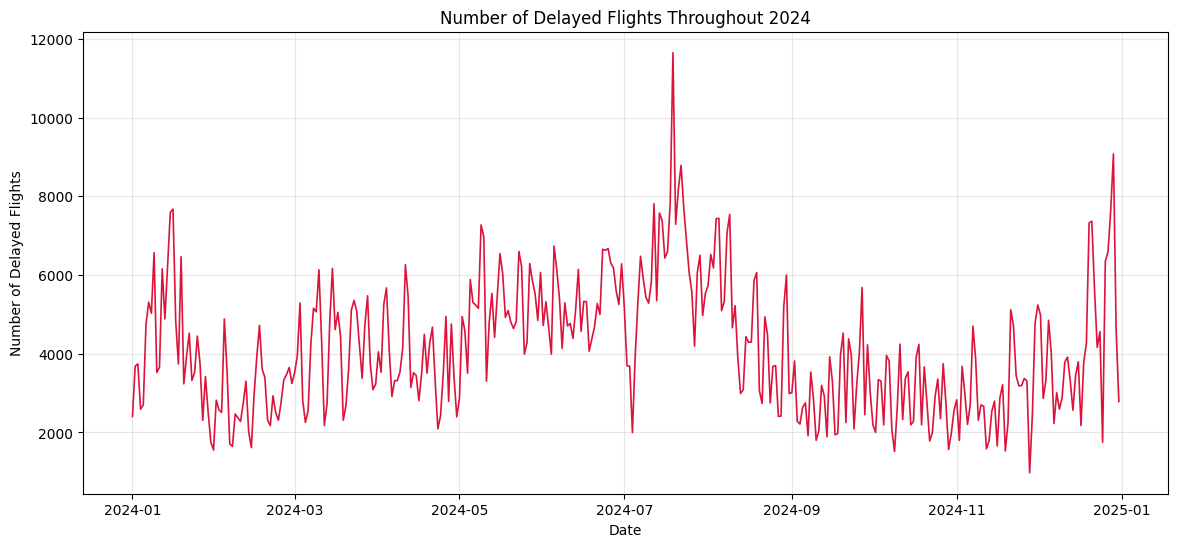

In [19]:
# Define "delayed" flights (e.g., ≥15 minutes delay)
flight_data['IS_DELAYED'] = flight_data['DEP_DELAY_NEW'] >= 15

# Create a proper datetime column for grouping
flight_data['DATE'] = pd.to_datetime(
    flight_data[['YEAR', 'MONTH', 'DAY_OF_MONTH']].rename(
        columns={'YEAR': 'year', 'MONTH': 'month', 'DAY_OF_MONTH': 'day'}
    )
)

# Aggregate total and delayed flight counts per day
daily_delay = flight_data.groupby('DATE').agg(
    TOTAL_FLIGHTS=('IS_DELAYED', 'count'),
    DELAYED_FLIGHTS=('IS_DELAYED', 'sum')
)
daily_delay['PCT_DELAYED'] = daily_delay['DELAYED_FLIGHTS'] / daily_delay['TOTAL_FLIGHTS'] * 100

# Plot: Number of delayed flights throughout 2024
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(daily_delay.index, daily_delay['DELAYED_FLIGHTS'], color='crimson', linewidth=1.2)
plt.title("Number of Delayed Flights Throughout 2024")
plt.xlabel("Date")
plt.ylabel("Number of Delayed Flights")
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
holidays = {
    'New Year': '2024-01-01',
    'Memorial Day': '2024-05-27',
    'Independence Day': '2024-07-04',
    'Labor Day': '2024-09-02',
    'Thanksgiving': '2024-11-28',
    'Christmas': '2024-12-25'
}
for name, date in holidays.items():
    plt.axvline(pd.to_datetime(date), color='gray', linestyle='--', alpha=0.6)
    plt.text(pd.to_datetime(date), daily_delay['DELAYED_FLIGHTS'].max()*0.9, name, rotation=90, fontsize=8)
